In [4]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_excel('UsedCarsSA_Ar.xlsx')
df

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,مستعملة,103000,الرياض,114000
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,مستعملة,5448,الرياض,على السوم
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,مستعملة,72418,الرياض,27500
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,مستعملة,114154,الرياض,43000
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,مستعملة,41912,الرياض,59500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,اودي,A6,2015,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,مستعملة,77000,الرياض,75000
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,شفروليه,كمارو,2010,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,مستعملة,150000,الرياض,53000
8245,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,NaN,بنزين,اوتوماتيك,مستعملة,260,نجران,على السوم
8246,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,مستعملة,18500,عسير,22000


In [6]:
df.head()


,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,مستعملة,103000,الرياض,114000
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,مستعملة,5448,الرياض,على السوم
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,مستعملة,72418,الرياض,27500
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,مستعملة,114154,الرياض,43000
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,مستعملة,41912,الرياض,59500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 902.2+ KB


In [8]:
df.describe()

,Year,Engine_Size,Mileage
count,8248.000000,5982.000000,8.248000e+03
mean,2014.014064,3.175794,1.494128e+05
std,5.935349,1.567480,3.455258e+05
min,1936.000000,1.000000,1.000000e+02
25%,2012.000000,2.000000,3.700000e+04
50%,2016.000000,2.700000,1.016575e+05
75%,2018.000000,4.000000,1.955520e+05
max,2022.000000,9.000000,2.000000e+07


In [9]:
df.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,مستعملة,103000,الرياض,114000
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,مستعملة,5448,الرياض,على السوم
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,مستعملة,72418,الرياض,27500
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,مستعملة,114154,الرياض,43000
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,مستعملة,41912,الرياض,59500


In [13]:
df.drop(['Link', 'Condition'], axis = 1, inplace = True)
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,103000,الرياض,114000
1,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,5448,الرياض,على السوم
2,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,72418,الرياض,27500
3,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,114154,الرياض,43000
4,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,41912,الرياض,59500
...,...,...,...,...,...,...,...,...,...,...,...,...
8243,اودي,A6,2015,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,77000,الرياض,75000
8244,شفروليه,كمارو,2010,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,150000,الرياض,53000
8245,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,NaN,بنزين,اوتوماتيك,260,نجران,على السوم
8246,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,18500,عسير,22000


In [14]:
df['Negotiable'] = False

In [15]:
for i in df ['Price'].index:
  if df['Price'][i] == 'على السوم':
      df['Negotiable'] [i] = True
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,103000,الرياض,114000,False
1,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,5448,الرياض,على السوم,True
2,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,72418,الرياض,27500,False
3,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,114154,الرياض,43000,False
4,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,41912,الرياض,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,اودي,A6,2015,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,77000,الرياض,75000,False
8244,شفروليه,كمارو,2010,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,150000,الرياض,53000,False
8245,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,NaN,بنزين,اوتوماتيك,260,نجران,على السوم,True
8246,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,18500,عسير,22000,False


In [17]:
df.duplicated().sum()

69

In [22]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [23]:
df.isnull().sum()

Make              0
Type              0
Year              0
Origin           95
Color             0
Options         109
Engine_Size    2254
Fuel_Type         0
Gear_Type        74
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

In [24]:
df[df['Type'] == 'النترا']['Engine_Size'].value_counts()

2.0    91
1.6    73
1.7     3
1.0     3
1.1     1
1.8     1
Name: Engine_Size, dtype: int64

In [25]:
df['Comm_Engine_Size'] = df.groupby(['Make', 'Type', 'Year', 'Options'])['Engine_Size'].transform(lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0])
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Comm_Engine_Size
0,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,103000,الرياض,114000,False,5.7
1,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,5448,الرياض,على السوم,True,4.8
2,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,72418,الرياض,27500,False,1.5
3,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,114154,الرياض,43000,False,1.6
4,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,41912,الرياض,59500,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,اودي,A6,2015,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,77000,الرياض,75000,False,2.3
8244,شفروليه,كمارو,2010,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,150000,الرياض,53000,False,6.2
8245,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,NaN,بنزين,اوتوماتيك,260,نجران,على السوم,True,4.6
8246,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,18500,عسير,22000,False,2.5


In [26]:
df['Engine_Size'] = df['Comm_Engine_Size']
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Comm_Engine_Size
0,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,103000,الرياض,114000,False,5.7
1,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,5448,الرياض,على السوم,True,4.8
2,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,72418,الرياض,27500,False,1.5
3,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,114154,الرياض,43000,False,1.6
4,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,41912,الرياض,59500,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,اودي,A6,2015,سعودي,سلفر,فل,2.3,بنزين,اوتوماتيك,77000,الرياض,75000,False,2.3
8244,شفروليه,كمارو,2010,سعودي,سلفر,فل,6.2,بنزين,اوتوماتيك,150000,الرياض,53000,False,6.2
8245,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,4.6,بنزين,اوتوماتيك,260,نجران,على السوم,True,4.6
8246,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,18500,عسير,22000,False,2.5


In [27]:
df.drop(['Comm_Engine_Size'], axis = 1, inplace= True)

In [28]:
df.dropna(subset = ['Origin' , 'Options', 'Engine_Size', 'Gear_Type'], inplace= True)
df.isnull().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

In [29]:
df['Negotiable'] = df['Negotiable'].map({True: 'قابل للتفاوض', False: 'غير قابل للتفاوض'})

df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,103000,الرياض,114000,غير قابل للتفاوض
1,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,5448,الرياض,على السوم,قابل للتفاوض
2,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,72418,الرياض,27500,غير قابل للتفاوض
3,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,114154,الرياض,43000,غير قابل للتفاوض
4,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,41912,الرياض,59500,غير قابل للتفاوض
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,اودي,A6,2015,سعودي,سلفر,فل,2.3,بنزين,اوتوماتيك,77000,الرياض,75000,غير قابل للتفاوض
8244,شفروليه,كمارو,2010,سعودي,سلفر,فل,6.2,بنزين,اوتوماتيك,150000,الرياض,53000,غير قابل للتفاوض
8245,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,4.6,بنزين,اوتوماتيك,260,نجران,على السوم,قابل للتفاوض
8246,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,18500,عسير,22000,غير قابل للتفاوض


In [30]:
df['Price'] = pd.to_numeric(df['Price'].replace('على السوم', pd.NA, regex= True), errors = 'coerce')
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,103000,الرياض,114000.0,غير قابل للتفاوض
1,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,5448,الرياض,NaN,قابل للتفاوض
2,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,72418,الرياض,27500.0,غير قابل للتفاوض
3,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,114154,الرياض,43000.0,غير قابل للتفاوض
4,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,41912,الرياض,59500.0,غير قابل للتفاوض
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,اودي,A6,2015,سعودي,سلفر,فل,2.3,بنزين,اوتوماتيك,77000,الرياض,75000.0,غير قابل للتفاوض
8244,شفروليه,كمارو,2010,سعودي,سلفر,فل,6.2,بنزين,اوتوماتيك,150000,الرياض,53000.0,غير قابل للتفاوض
8245,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,4.6,بنزين,اوتوماتيك,260,نجران,NaN,قابل للتفاوض
8246,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,18500,عسير,22000.0,غير قابل للتفاوض


In [31]:
dfo = df.copy()

In [32]:
le = LabelEncoder()

In [33]:
original_to_encoded = {}
columns_to_label = ['Make', 'Type', 'Origin', 'Color', 'Options', 'Fuel_Type', 'Gear_Type', 'Region']
for column in columns_to_label:
    unique_values = df[column].unique()
    mapping = {encoded: original for original, encoded in enumerate(unique_values)}
    original_to_encoded[column] = mapping
    df[column] = le.fit_transform(df[column].values)

In [34]:
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,41,25,2018,2,3,1,5.7,0,0,103000,7,114000.0,غير قابل للتفاوض
1,54,173,2016,2,0,1,4.8,0,0,5448,7,NaN,قابل للتفاوض
2,54,285,2019,2,12,0,1.5,0,0,72418,7,27500.0,غير قابل للتفاوض
3,58,157,2019,2,10,0,1.6,0,0,114154,7,43000.0,غير قابل للتفاوض
4,58,157,2019,2,12,2,2.0,0,0,41912,7,59500.0,غير قابل للتفاوض
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,5,18,2015,2,12,1,2.3,0,0,77000,7,75000.0,غير قابل للتفاوض
8244,31,329,2010,2,12,1,6.2,0,0,150000,7,53000.0,غير قابل للتفاوض
8245,13,349,2013,1,0,1,4.6,0,0,260,24,NaN,قابل للتفاوض
8246,54,147,2011,2,12,1,2.5,0,0,18500,22,22000.0,غير قابل للتفاوض


In [35]:
ndf = df.copy()
ndf = ndf[ndf['Negotiable'] == 'قابل للتفاوض']
ndf

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
1,54,173,2016,2,0,1,4.8,0,0,5448,7,NaN,قابل للتفاوض
7,18,378,2009,2,7,1,6.2,0,0,323000,7,NaN,قابل للتفاوض
19,18,378,2018,2,0,1,5.3,0,0,37000,7,NaN,قابل للتفاوض
27,13,315,2019,2,1,1,2.5,0,0,8000,23,NaN,قابل للتفاوض
29,13,133,2008,0,1,1,3.6,0,0,169000,7,NaN,قابل للتفاوض
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,48,43,2015,2,1,0,3.6,0,0,195000,11,NaN,قابل للتفاوض
8234,36,142,2010,0,3,2,1.6,0,0,3275230,2,NaN,قابل للتفاوض
8235,13,299,2020,2,0,2,2.7,0,0,82000,23,NaN,قابل للتفاوض
8237,13,299,2014,2,0,2,2.7,0,0,497480,7,NaN,قابل للتفاوض


In [36]:
undf = df.copy()
undf = undf[undf['Negotiable'] == 'غير قابل للتفاوض']
undf

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,41,25,2018,2,3,1,5.7,0,0,103000,7,114000.0,غير قابل للتفاوض
2,54,285,2019,2,12,0,1.5,0,0,72418,7,27500.0,غير قابل للتفاوض
3,58,157,2019,2,10,0,1.6,0,0,114154,7,43000.0,غير قابل للتفاوض
4,58,157,2019,2,12,2,2.0,0,0,41912,7,59500.0,غير قابل للتفاوض
5,57,146,2018,2,13,1,1.5,0,0,39000,7,72000.0,غير قابل للتفاوض
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8242,43,268,2006,2,13,1,3.5,0,1,257000,6,15000.0,غير قابل للتفاوض
8243,5,18,2015,2,12,1,2.3,0,0,77000,7,75000.0,غير قابل للتفاوض
8244,31,329,2010,2,12,1,6.2,0,0,150000,7,53000.0,غير قابل للتفاوض
8246,54,147,2011,2,12,1,2.5,0,0,18500,22,22000.0,غير قابل للتفاوض


In [37]:
undf.drop(['Negotiable'], axis = 1, inplace = True)
undf['Price'] = undf['Price'].astype(int)
undf

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,41,25,2018,2,3,1,5.7,0,0,103000,7,114000
2,54,285,2019,2,12,0,1.5,0,0,72418,7,27500
3,58,157,2019,2,10,0,1.6,0,0,114154,7,43000
4,58,157,2019,2,12,2,2.0,0,0,41912,7,59500
5,57,146,2018,2,13,1,1.5,0,0,39000,7,72000
...,...,...,...,...,...,...,...,...,...,...,...,...
8242,43,268,2006,2,13,1,3.5,0,1,257000,6,15000
8243,5,18,2015,2,12,1,2.3,0,0,77000,7,75000
8244,31,329,2010,2,12,1,6.2,0,0,150000,7,53000
8246,54,147,2011,2,12,1,2.5,0,0,18500,22,22000


In [38]:
undf.reset_index(drop = True, inplace = True)
undf

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,41,25,2018,2,3,1,5.7,0,0,103000,7,114000
1,54,285,2019,2,12,0,1.5,0,0,72418,7,27500
2,58,157,2019,2,10,0,1.6,0,0,114154,7,43000
3,58,157,2019,2,12,2,2.0,0,0,41912,7,59500
4,57,146,2018,2,13,1,1.5,0,0,39000,7,72000
...,...,...,...,...,...,...,...,...,...,...,...,...
5157,43,268,2006,2,13,1,3.5,0,1,257000,6,15000
5158,5,18,2015,2,12,1,2.3,0,0,77000,7,75000
5159,31,329,2010,2,12,1,6.2,0,0,150000,7,53000
5160,54,147,2011,2,12,1,2.5,0,0,18500,22,22000


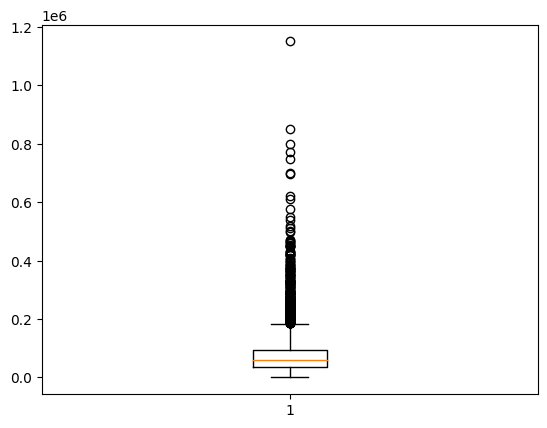

In [40]:
plt.boxplot(undf['Price']);

In [41]:
Q1 = 36000
Q3 = 95000
IQR = Q3 - Q1
lo = Q1 - 1.5 * (IQR)
ho = Q3 + 1.5 * (IQR)
print('lower outliers: ' , lo)
print('higher outliers: ' , ho)

lower outliers:  -52500.0
higher outliers:  183500.0


In [42]:
undf = undf.drop(undf[(undf['Price'] > ho) | (undf['Price'] <= 0)].index)
undf.reset_index(drop = True, inplace = True)
undf

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,41,25,2018,2,3,1,5.7,0,0,103000,7,114000
1,54,285,2019,2,12,0,1.5,0,0,72418,7,27500
2,58,157,2019,2,10,0,1.6,0,0,114154,7,43000
3,58,157,2019,2,12,2,2.0,0,0,41912,7,59500
4,57,146,2018,2,13,1,1.5,0,0,39000,7,72000
...,...,...,...,...,...,...,...,...,...,...,...,...
4825,43,268,2006,2,13,1,3.5,0,1,257000,6,15000
4826,5,18,2015,2,12,1,2.3,0,0,77000,7,75000
4827,31,329,2010,2,12,1,6.2,0,0,150000,7,53000
4828,54,147,2011,2,12,1,2.5,0,0,18500,22,22000


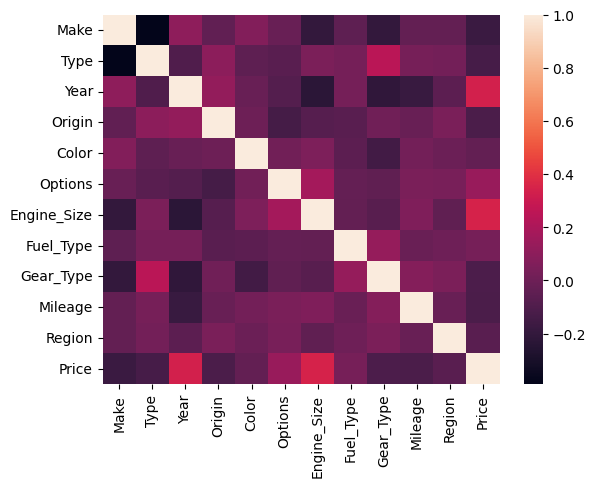

In [43]:
sns.heatmap(undf.corr());

In [44]:
undf.columns

Index(['Make', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size',
       'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price'],
      dtype='object')

In [45]:
X = undf.drop('Price', axis = 1)

y = undf['Price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
lr_pred = lr.predict(X_test)
lr_rv = list(y_test)

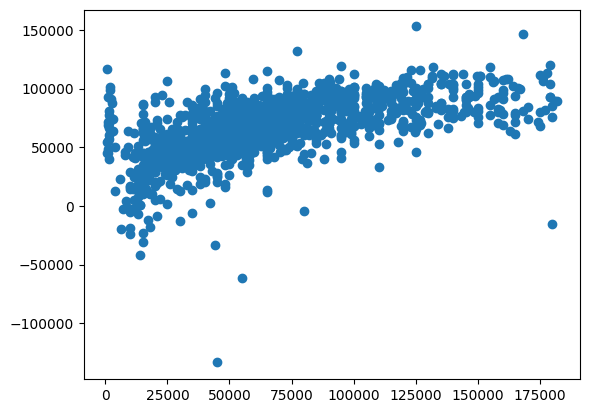

In [51]:
plt.scatter(lr_rv, lr_pred);

In [52]:
import numpy as np

In [53]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(lr_rv, lr_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(lr_rv, lr_pred))
print('Root Mean Absolute Error: ', np.sqrt(metrics.mean_absolute_error(lr_rv, lr_pred)))

Mean Absolute Error:  22049.689465363503
Mean Squared Error:  914471894.7785954
Root Mean Absolute Error:  148.49137842098276


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
rf = RandomForestRegressor(n_estimators = 50) # n_estimators means number of trees in the forest

In [55]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [56]:
rf_pred = rf.predict(X_test)
rf_rv = list(y_test)

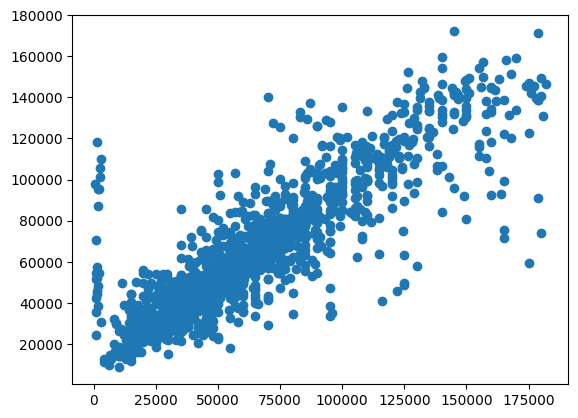

In [57]:
plt.scatter(rf_rv, rf_pred);

In [ ]:
cmap = plt.cm.get_cmap('viridis', len(lr_rv))

In [58]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(rf_rv, rf_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(rf_rv, rf_pred))
print('Root Mean Absolute Error: ', np.sqrt(metrics.mean_absolute_error(rf_rv, rf_pred)))

Mean Absolute Error:  12048.111718426502
Mean Squared Error:  360200517.4361156
Root Mean Absolute Error:  109.76389077664157


In [59]:
ndf

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
1,54,173,2016,2,0,1,4.8,0,0,5448,7,NaN,قابل للتفاوض
7,18,378,2009,2,7,1,6.2,0,0,323000,7,NaN,قابل للتفاوض
19,18,378,2018,2,0,1,5.3,0,0,37000,7,NaN,قابل للتفاوض
27,13,315,2019,2,1,1,2.5,0,0,8000,23,NaN,قابل للتفاوض
29,13,133,2008,0,1,1,3.6,0,0,169000,7,NaN,قابل للتفاوض
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,48,43,2015,2,1,0,3.6,0,0,195000,11,NaN,قابل للتفاوض
8234,36,142,2010,0,3,2,1.6,0,0,3275230,2,NaN,قابل للتفاوض
8235,13,299,2020,2,0,2,2.7,0,0,82000,23,NaN,قابل للتفاوض
8237,13,299,2014,2,0,2,2.7,0,0,497480,7,NaN,قابل للتفاوض


In [60]:
ndf.drop(['Price', 'Negotiable'], axis = 1, inplace = True)
ndf

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region
1,54,173,2016,2,0,1,4.8,0,0,5448,7
7,18,378,2009,2,7,1,6.2,0,0,323000,7
19,18,378,2018,2,0,1,5.3,0,0,37000,7
27,13,315,2019,2,1,1,2.5,0,0,8000,23
29,13,133,2008,0,1,1,3.6,0,0,169000,7
...,...,...,...,...,...,...,...,...,...,...,...
8231,48,43,2015,2,1,0,3.6,0,0,195000,11
8234,36,142,2010,0,3,2,1.6,0,0,3275230,2
8235,13,299,2020,2,0,2,2.7,0,0,82000,23
8237,13,299,2014,2,0,2,2.7,0,0,497480,7


In [61]:
ndf['Predicted Price'] = rf.predict(ndf)
ndf

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Predicted Price
1,54,173,2016,2,0,1,4.8,0,0,5448,7,101050.0
7,18,378,2009,2,7,1,6.2,0,0,323000,7,38690.0
19,18,378,2018,2,0,1,5.3,0,0,37000,7,150412.4
27,13,315,2019,2,1,1,2.5,0,0,8000,23,98813.9
29,13,133,2008,0,1,1,3.6,0,0,169000,7,40530.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8231,48,43,2015,2,1,0,3.6,0,0,195000,11,59940.0
8234,36,142,2010,0,3,2,1.6,0,0,3275230,2,41060.0
8235,13,299,2020,2,0,2,2.7,0,0,82000,23,105132.0
8237,13,299,2014,2,0,2,2.7,0,0,497480,7,47960.0


In [62]:
nprices = ndf['Predicted Price']
nprices

1       101050.0
7        38690.0
19      150412.4
27       98813.9
29       40530.0
          ...   
8231     59940.0
8234     41060.0
8235    105132.0
8237     47960.0
8245    115380.0
Name: Predicted Price, Length: 2165, dtype: float64

In [63]:
nulls = dfo.index[dfo['Price'].isnull()]
nulls

Int64Index([   1,    7,   19,   27,   29,   78,   86,   87,   96,  109,
            ...
            8202, 8208, 8211, 8225, 8229, 8231, 8234, 8235, 8237, 8245],
           dtype='int64', length=2165)

In [65]:
dfo.loc[nulls,'Price'] = nprices[:len(nulls)+1]
dfo

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,103000,الرياض,114000.0,غير قابل للتفاوض
1,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,5448,الرياض,101050.0,قابل للتفاوض
2,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,72418,الرياض,27500.0,غير قابل للتفاوض
3,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,114154,الرياض,43000.0,غير قابل للتفاوض
4,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,41912,الرياض,59500.0,غير قابل للتفاوض
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,اودي,A6,2015,سعودي,سلفر,فل,2.3,بنزين,اوتوماتيك,77000,الرياض,75000.0,غير قابل للتفاوض
8244,شفروليه,كمارو,2010,سعودي,سلفر,فل,6.2,بنزين,اوتوماتيك,150000,الرياض,53000.0,غير قابل للتفاوض
8245,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,4.6,بنزين,اوتوماتيك,260,نجران,115380.0,قابل للتفاوض
8246,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,18500,عسير,22000.0,غير قابل للتفاوض
